# Ground deformation and monitoring

Volcanoes often exhibit geophysical and geochemical signals before, during and after an eruption. These signals allow volcanologists to monitor active volcanoes to gain knowledge about processes in the magma chamber, conduit and edifice and to potentially predict the time and location of a future eruption. 

One type of geophysical signal is the deformation or movement of the volcanic edifice and surrounding crust. Changes in the surface of the volcano are related to magma intrusion, dome growth, pressure increase in the magma chamber or flank instability.

In 1958, Kyioo Mogi [published a paper](https://radar.community.uaf.edu/wp-content/uploads/sites/667/2017/04/Mogi1958.pdf) where he presented a model to explain the radial deformation observed during and after the 1914 eruption of Sakurakima volcano in Japan. 

In this exercise you will explore how surface deformation signals can be related to pressure and volume changes in magma chambers using the Mogi (1958) model. 

### Outlines and objectives:

- Part 1: Create a model of surface deformation 
- Part 2: Compare modelled deformation with observations and invert the model to constrain the properties of the source 

## Part 1: Model surface deformation

Calculate a model for surface deformation at a volcano in terms of vertical and horizontal displacement components (cm) of the ground as a function of the distance away from the center of deformation, following Mogi (1958) formulation. Surface deformation can be expressed by a spherical pressure source buried in an elastic medium. Therefore, a change in pressure (or in volume) at the source level causes a displacement at the surface:

- **Horizontal displacement:**
$$U_z = \frac{3a^3\ \Delta P\ d}{4G\sqrt{(d^2+r^2)^3}}$$
- **Vertical displacement:**
$$U_r = \frac{3a^3\ \Delta P\ r}{4G\sqrt{(d^2+r^2)^3}}$$

Where:

- $a$: Radius of the source sphere [km]
- $b$: Depth to the center of the source sphere [km]
- $G$: Shear modulus [GPa]
- $\Delta P$: change in pressure in the sphere [MPa]
- $r$: Radial distance on the surface [km]
- $U_r$: Horizontal displacement [m]
- $U_rz$: Vertical displacement [m]


We first start by importing the main libraries we will be using:
- `pandas` is useful for tabulated data (e.g., such as an Excel table)
- `numpy` provides the most common math functions 

We then create a pandas *dataframe*, which is the main object that will store our data. 

|   r |   ur_m |   uz_m |
|----:|-------:|-------:|
|   0 |      0 |      0 |
|   1 |      0 |      0 |
|   2 |      0 |      0 |
|   3 |      0 |      0 |
|   4 |      0 |      0 |
|  ... |      ... |      ... |
|  30 |      0 |      0 |

In [76]:
# Importing the main libraries we are going to use
import pandas as pd # Used to store the data 
import numpy as np # Used to perform the calculations
import matplotlib.pyplot as plt # Used to plot the data

# Creating a dataframe - don't worry too much about this for now
r = np.arange(0,31,1)
df = pd.DataFrame({'r': r, 'ur_m': [0]*len(r), 'uz_m': [0]*len(r)})


We now have a *dataframe* variable called `df` that contains the radial distance on the surface stored in the column called `r`. Let's review the most basic commands we will use:

- **Pandas**

  - To access the values of a column: 
      ```python
        df['r']
      ```
  - To set a new value to a column: 
      ```python
        df['ur_m'] = 2.5
      ```
  - To fill the value of a column based on calculations that depend on another column: 
      ```python
        df['ur_cm'] = df['ur_m']*1e2
      ```

- **Arithmetic operations**

  - Power: Using `**`
    - `2**3` is equal to 8

  - Square root: `np.sqrt()`
    - `np.sqrt(9)` is equal to 3
    - Alternatively `9**1/3` is also equal to 3

- **Combining both**

  - You can easily use `numpy` operators with `pandas`:

      ```python
        df['ur_cm'] = np.sqrt(df['r'])
      ```

Back to the objective: we want to compute the vertical ($U_r$) and horizontal ($U_z$) displacements as a function of radial distance `r` using the appropriate equations

     r      ur_m      uz_m     ur_cm     uz_cm
0    0  0.000000  0.020000  0.000000  2.000000
1    1  0.003771  0.018857  0.377146  1.885732
2    2  0.006403  0.016008  0.640329  1.600822
3    3  0.007566  0.012610  0.756611  1.261019
4    4  0.007618  0.009523  0.761823  0.952279
5    5  0.007071  0.007071  0.707107  0.707107
6    6  0.006297  0.005247  0.629690  0.524741
7    7  0.005498  0.003927  0.549820  0.392729
8    8  0.004764  0.002978  0.476404  0.297752
9    9  0.004123  0.002291  0.412338  0.229077
10  10  0.003578  0.001789  0.357771  0.178885
11  11  0.003118  0.001417  0.311769  0.141713
12  12  0.002731  0.001138  0.273100  0.113792
13  13  0.002406  0.000925  0.240553  0.092520
14  14  0.002131  0.000761  0.213064  0.076094
15  15  0.001897  0.000632  0.189737  0.063246
16  16  0.001698  0.000531  0.169836  0.053074
17  17  0.001528  0.000449  0.152765  0.044931
18  18  0.001380  0.000383  0.138040  0.038344
19  19  0.001253  0.000330  0.125269  0.032965
20  20  0.001

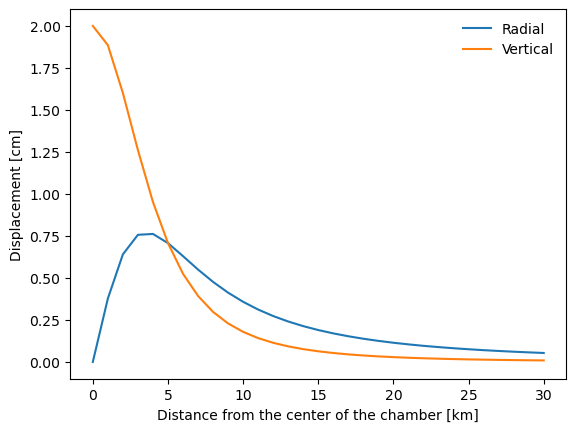

In [77]:
# Setting the main model parameters
G = 30 # Shear modulus [GPa]
dP = 20 # Pressure difference [MPa]
a = 1 # Chamber radius [km]
d = 5 # Chamber depth [km]

# Calculate the radial and vertical displacements
# To fill
# df['ur_m'] = 
# df['uz_m'] = 
# Answers
df['ur_m'] = (3*a**3*dP*df['r'])/(4*G*np.sqrt((d**2+df['r']**2)**3))
df['uz_m'] = (3*a**3*dP*d)/(4*G*np.sqrt((d**2+df['r']**2)**3))

# Convert the results to cm
df['ur_cm'] = df['ur_m']*1e2
df['uz_cm'] = df['uz_m']*1e2

# Display the results
print(df)

# Plotting the results
fig, ax = plt.subplots()
ax.plot(df['r'], df['ur_cm'], label='Radial')
ax.plot(df['r'], df['uz_cm'], label='Vertical')
ax.set_xlabel('Distance from the center of the chamber [km]')
ax.set_ylabel('Displacement [cm]')
plt.legend(frameon=False);

### :question: Question 1:

Look at the vertical and horizontal components vs the distance. How do these curves differ?

> Provide your answer here

## Part 2: Apply and compare the model to observations

We now have a working models to estimate the surface displacement based on the geometric properties of a Mogi source body. After some time, you are provided with observed deformation measured at 4 GPS stations, where $r$ is the radial distance (km) and `obs_ur` and `obs_uz` are the horizontal and vertical displacements, respectively: 

| GNSS station   |    r |   obs_uz |   obs_ur |
|:---------------|-----:|---------:|---------:|
| LP03           |  5.1 |    0.22  |    0.12  |
| ARID           |  5.8 |    0.151 |    0.196 |
| LP04           |  8.9 |    0.098 |    0.122 |
| MOLU           | 10.7 |    0.03  |    0.045 |

In addition, various methods provide updates on the following parameters:

- Pressure change $\Delta P$: 70 MPa 
- Shear modulus $G$: 30 GPa 
- Range of possible chamber radius $a$:
- Range of possible chamber depth $d$:

### Part 2.1: Compare modelled deformation with measured GPS data

We first want to test the **agreement between modelled and observed** deformation data. For this, we will use Pearson's $\Chi^2$ coefficient:

$$
\Chi^2 = \sum_{i=1}^{n} \frac{(O_i - M_i)^2}{M_i}
$$

where:
- $O_i$ is the observed value at station $i$,
- $M_i$ is the modelled value at station $i$,
- $n$ is the number of observations.
                         
Let's start by computing the $\Chi^2$ value for:
- A chamber depth $d$ of 6 km 
- A chamber radius $a$ of 1.5 km

#### :bulb: Steps 2.1

In the code below, the equations to compute the displacement have been turned into a *function* - don't worry too much about it - but calling the function on the `station` dataframe will automatically add the modelled deformation data as separate columns (i.e., `mod_uz` and `mod_ur`).

1. Calculate the $\Chi^2$ value for both the vertical and horizontal components of deformation across all stations 
2. Sum the $\Chi^2$ value for both the vertical and horizontal components of deformation across all stations. This can be achieved as:

    ```python
        chi2 = stations['chi_ur'].sum() + stations['chi_uz'].sum()
    ```

In [18]:
# Calculate the radial and vertical displacements
def get_deformation(df, a, d, dP, G):
    """
    Calculate the deformation components (radial and vertical) based on the given parameters.
    Parameters:
    df (DataFrame): A pandas DataFrame containing a column 'r' which represents the radial distance.
    a (float): Radius of the spherical source (km).
    d (float): Depth of the spherical source (km).
    dP (float): Pressure change in the spherical source (MPa).
    G (float): Shear modulus of the surrounding medium (GPa).
    Returns:
    DataFrame: The input DataFrame with two new columns:
        - 'mod_ur': Radial deformation component (cm).
        - 'mod_uz': Vertical deformation component (cm).
    """

    df['mod_ur'] = (3*a**3*dP*df['r'])/(4*G*np.sqrt((d**2+df['r']**2)**3))
    df['mod_uz'] = (3*a**3*dP*d)/(4*G*np.sqrt((d**2+df['r']**2)**3))
    return df

# Create a dataframe that contains the data observed at the stations
data = {
    'GNSS station': ['LP03', 'ARID', 'LP04', 'MOLU'],
    'r': [5.1, 5.8, 8.9, 10.7],
    'obs_uz': [0.220, 0.151, 0.098, 0.030],
    'obs_ur': [0.120, 0.196, 0.122, 0.045],
}
stations = pd.DataFrame(data).set_index('GNSS station')

# Updating the main model parameters
G = 30 # Shear modulus [GPa]
dP = 70 # Pressure difference [MPa]
a = 1.5 # Chamber radius [km]
d = 6 # Chamber depth [km]

# Calculate the modelled displacements
stations = get_deformation(stations,a,d,dP,G)

# Compute χ² for the radial and vertical displacements
# To fill
# stations['chi_ur'] = 
# stations['chi_uz'] = 

# Answers
stations['chi_ur'] = (stations['obs_ur'] - stations['mod_ur'])**2/stations['mod_ur']
stations['chi_uz'] = (stations['obs_uz'] - stations['mod_uz'])**2/stations['mod_uz']

# Compute the sum of χ² across all stations and components
chi2 = stations['chi_ur'].sum() + stations['chi_uz'].sum()
print(stations)
print(f"\nTotal χ² for a chamber depth of {d} km and a chamber radius of {a} km: {chi2:.2f}")


                 r  obs_uz  obs_ur    mod_ur    mod_uz    chi_ur    chi_uz
GNSS station                                                              
LP03           5.1   0.220   0.120  0.061686  0.072572  0.055125  0.299494
ARID           5.8   0.151   0.196  0.058946  0.060978  0.318665  0.132898
LP04           8.9   0.098   0.122  0.042508  0.028657  0.148657  0.167795
MOLU          10.7   0.030   0.045  0.034232  0.019196  0.003387  0.006081

Total χ² for a chamber depth of 6 km and a chamber radius of 1.5 km: 1.13


### Part 2.2: Model inversion to constrain source properties

We now have a framework to:
1. Model surface deformation based on the geometric properties of the source;
2. Compare model output to observations.

The next objective is to **invert** the model to constrain the input parameters that best reproduce the observations provided by GPS data. Specifically, we are interested in finding the values of magma chamber depth and radius that result in the lowest $\Chi^2$ value. The ranges we want to explore are:
- **Chamber depth** $d$: Between 6 and 11 km at a 0.5 km interval
- **Chamber radius** $1$: Between 2 and 3 km at a 0.25 km interval

The equations to compute the $\Chi^2$ are now turned into a *function*, again don't worry. The code iterates through values of $d$ and $a$ and returns a $\Chi^2$ for each combination. It outputs a plot mapping $log_{10}(\Chi^2)$ as a function of $d$ and $a$.


Five combinations of chamber depth and radius resulting in the lowest χ²:
Chamber depth (km)  Chamber radius (km)
2.25                7.0                    0.078797
2.00                6.0                    0.080209
2.25                7.5                    0.082229
                    6.5                    0.091270
                    8.0                    0.101559
dtype: float64


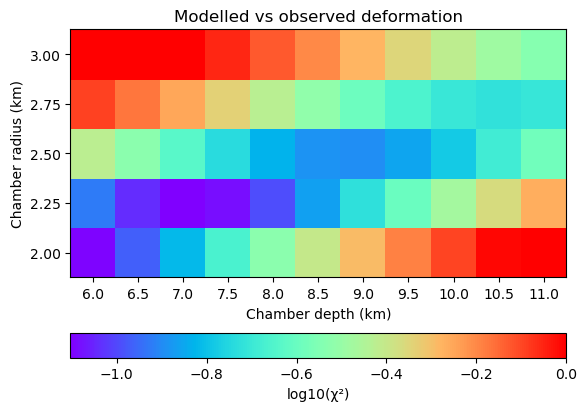

In [73]:
def get_chi2(df, a, d, dP, G):
    """
    Calculate the chi-squared (χ²) statistic for the radial and vertical displacements.
    Parameters:
    df (DataFrame): DataFrame containing observed and modeled deformation data.
    a (float): Radius of the spherical source (km).
    d (float): Depth of the spherical source (km).
    dP (float): Pressure change in the spherical source (MPa).
    G (float): Shear modulus of the surrounding medium (GPa).
    Returns:
    float: The sum of chi-squared (χ²) values for the radial and vertical displacements across all stations and components.
    """
    
    # Get the deformation
    tmp = get_deformation(df,a,d,dP,G)
    # Compute χ² for the radial and vertical displacements
    tmp['chi_ur'] = (tmp['obs_ur'] - tmp['mod_ur'])**2/tmp['mod_ur']
    tmp['chi_uz'] = (tmp['obs_uz'] - tmp['mod_uz'])**2/tmp['mod_uz']
    # Compute the sum of χ² across all stations and components
    return tmp['chi_ur'].sum() + tmp['chi_uz'].sum()  
    
# Set the ranges of radius and depth to explore   
a_range = np.arange(2, 3.25, 0.25)
d_range = np.arange(6, 11.25, 0.5)

# Create a dataframe to store the results
chi2_tot = pd.DataFrame(index=a_range, columns=d_range, dtype=float)
chi2_tot.index.name = 'Chamber depth (km)'
chi2_tot.columns.name = 'Chamber radius (km)'

# Iterate through the parameter ranges and calculate χ²
for ai in a_range:
    for di in d_range:
        chi2_tot.loc[ai, di] = get_chi2(stations, ai, di, dP, G)

# Plot the results
fig, ax = plt.subplots()
cax = ax.pcolor(d_range, a_range, np.log10(chi2_tot), cmap='rainbow', vmax=0)
ax.set(title='Modelled vs observed deformation', xlabel='Chamber depth (km)', ylabel='Chamber radius (km)', xticks=d_range, yticks=a_range, aspect=len(d_range)/len(a_range));
fig.colorbar(cax, ax=ax, label='log10(χ²)', orientation='horizontal')

# Print the best fitting parameters
best_fit = chi2_tot.stack().sort_values()
print('\nFive combinations of chamber depth and radius resulting in the lowest χ²:')
print(best_fit.reindex().head(5))

### :question: Question 2:

What is your best estimate for the chamber depth? What factors, simplified or not considered at all by the model, can play a role and cause mismatch between observed and modelled data?

> Provide your answer here

## Further resources

- More information on the Mogi model: https://gscommunitycodes.usf.edu/geoscicommunitycodes/public/numeracy/numeracy_mogi/mogi.html

## References

- Mogi, K.: Relations between the eruptions of various volcanoes and the deformations of the ground surfaces around them, Earthq Res Inst, 36, 99–134, 1958.
- Connor, C.: Computing for Numeracy: Kiyoo Mogi and the Nature of Volcanoes, Numeracy, 15, https://doi.org/10.5038/1936-4660.15.1.1400, 2022.
